<a href="https://colab.research.google.com/github/NamrathaHV/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction using Machine Learning Approach**

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:


*   116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
*   On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
*   On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this machine learning project, we have collected the dataset from UCI (https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.




**Problem Statement**

*   Complete analysis of Heart Disease UCI dataset.
*   To predict whether a person has a heart disease or not based on the various biological and physical parameters.





**Machine Learning Algorithms**

*   Random Forest Classifier
*   K-Nearest Neighbors Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier

## **Import libraries**

Let's first import all the necessary libraries. We will use `numpy` and `pandas` to start with. For visualization, we will use`pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors and `seaborn`. For implementing Machine Learning models and processing of data, we will use the `sklearn` library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

For processing the data, we'll import a few libraries. To split the available dataset for testing and training, we'll use the `train_test_split` method. To scale the features, we are using `StandardScaler`.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

For model validation, we'll import a few libraries.

In [3]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [4]:
#extra
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

Next, we will import all the Machine Learning algorithms

*   K-Nearest Neighbors Classifier
*   Random Forest Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## **Import dataset**

Now that we have all the libraries we will need, we can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. We'll use the pandas `read_csv` method to read the dataset.

In [6]:
dataset = pd.read_csv('dataset.csv',sep=',',encoding="utf-8")

### **Data Preparation and Data Exploration**

In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
dataset.shape

(270, 14)

The dataset is now loaded into the variable dataset. We'll just take a glimpse of the data using the `desribe()` and `info()` methods before we actually start processing and visualizing it.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


Looks like the dataset has a total of 270 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [10]:
dataset.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

In [12]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [13]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [14]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So, we have no missing values

In [15]:
dataset.apply(lambda x:len(x.unique()))


age          41
sex           2
cp            4
trestbps     47
chol        144
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      39
slope         3
ca            4
thal          3
target        2
dtype: int64

In [16]:
print('cp ',dataset['cp'].unique())
print('fbs ',dataset['fbs'].unique())
print('restecg ',dataset['restecg'].unique())
print('exang ',dataset['exang'].unique())
print('slope ',dataset['slope'].unique())
print('ca ',dataset['ca'].unique())
print('thal ',dataset['thal'].unique())


cp  [4 3 2 1]
fbs  [0 1]
restecg  [2 0 1]
exang  [0 1]
slope  [2 1 3]
ca  [3 0 1 2]
thal  [3 7 6]


### **Dataset Description:**

This dataset consists of 13 features and a target variable. The detailed description of all the features are as follows:

1. **Age**: Patients Age in years (Numeric)

---

2. **Sex**: Gender of patient (Male - 1, Female - 0)(Nominal)

---

3. **Chest Pain Type**: Type of chest pain experienced by patient categorized into :(Nominal)
* Value 1: Typical angina
* Value 2: Atypical angina
* Value 3: Non-anginal pain
* Value 4: Asymptomatic

(Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.)

---

4. **resting bps**: Level of blood pressure at resting mode in mm/HG (Numerical)

---

5. **cholestrol**: Serum cholestrol in mg/dl (Numeric)
(Cholesterol means the blockage for blood supply in the blood vessels)

---

6. **fasting blood sugar**: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
(blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.)

---

7. **resting ecg**: Result of electrocardiogram while at rest are represented in 3 distinct values: (Nominal)
* Value 0: Normal
* Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.

( ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening)

---

8. **oldpeak**: Exercise induced ST-depression in comparison with the state of rest (Numeric)

(ST Depression is the difference between value of ECG at rest and after exercise.
An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches.)

---

9. **ST slope**: ST segment measured in terms of slope during peak exercise (Nominal) 
* Value 1: Upsloping
* Value 2: Flat
* Value 3: Downsloping

---

10. **ca**: Number of major blood vessels (0-3)(Numeric)

(Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched)

---

11. **exang**: Exercise induced angina (1 = yes; 0 = no)

(is chest pain while exercising or doing any physical activity.)

---

12. **thal**: Thalium stress test 
* Value 3: normal
* Value 6: fixed defect
* Value 7: reversibe defect

---

13. **thalach**: Maximum heart rate achieved in bpm(Numeric)

---
---

**Target variable**
14. **target**: It is the target variable which we have to predict 2 means patient is suffering from heart risk and 1 means patient is normal. (1 = no disease; 2 = disease)

## **Data Visualization**
Now let's see various visual representations of the data to understand more about relationship between various features.

### **Distribution of Heart disease (target variable)**

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

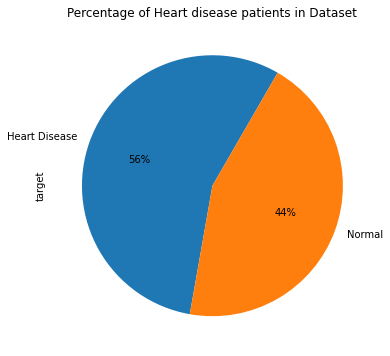

In [17]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

In [18]:
y = dataset["target"]

1    150
2    120
Name: target, dtype: int64


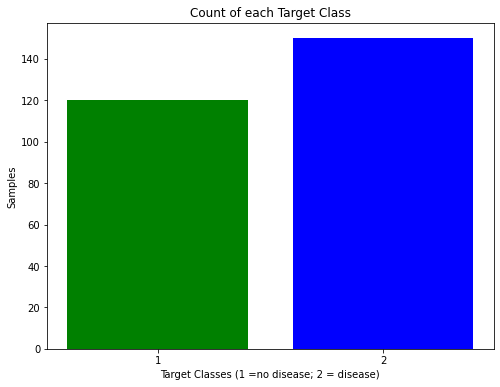

In [19]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([1, 2])
plt.xlabel('Target Classes (1 =no disease; 2 = disease)')
plt.ylabel('Samples')
plt.title('Count of each Target Class')
target_temp = dataset.target.value_counts()
print(target_temp)

From the total dataset of 270 patients, 150 (56%) have a heart disease (target=2)

Next, we'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89733e59d0>,
      dtype=object)

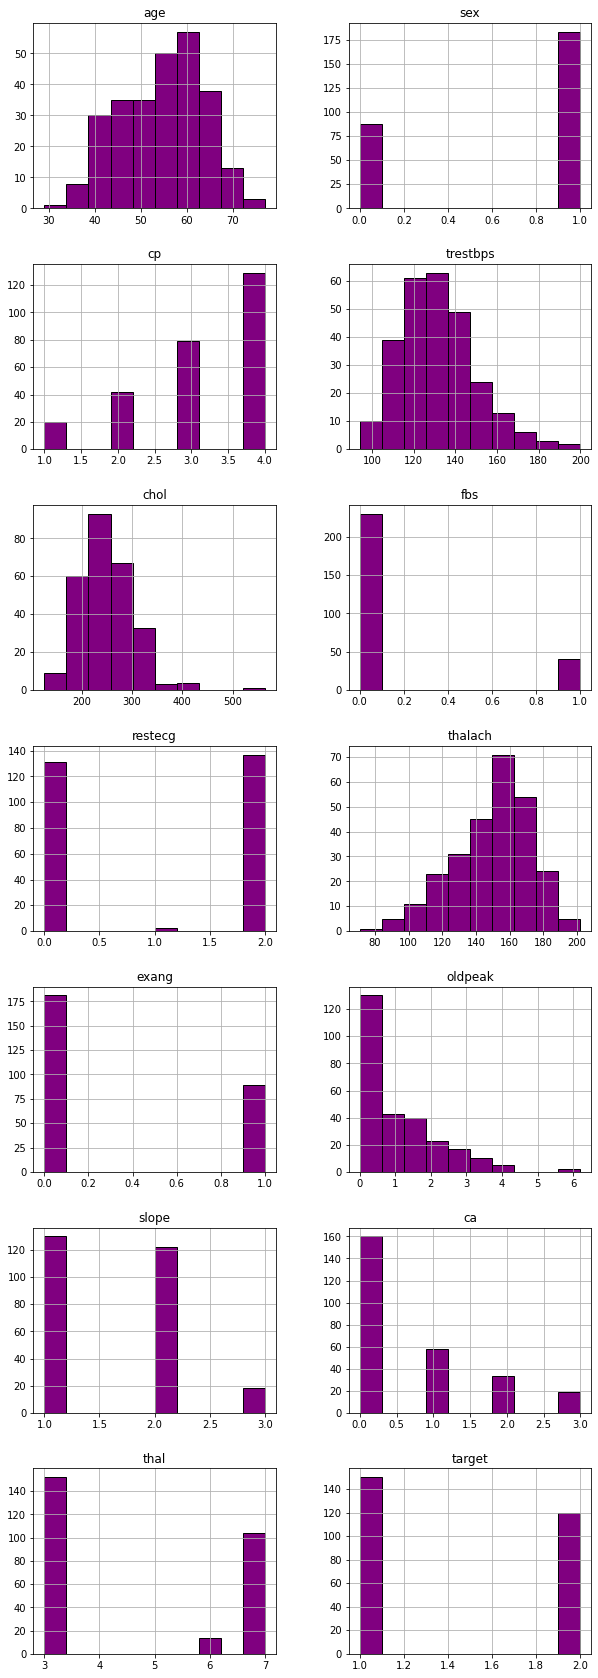

In [20]:
dataset.hist(edgecolor='black',layout = (7, 2),
            figsize = (10, 30),
            color=['purple'])

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

## **Exploratory Data Analysis (EDA)**

### **Gender distribution based on heart disease**

In [21]:
dataset["sex"].unique()

array([1, 0])

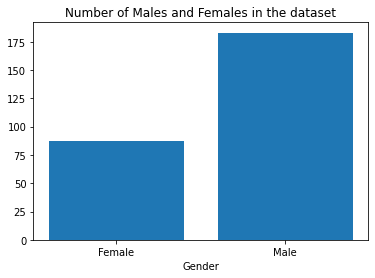

In [22]:
# Number of males and females
F = dataset[dataset["sex"] == 0].count()["target"]
M = dataset[dataset["sex"] == 1].count()["target"]

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()


**Heart Disease frequency for gender**

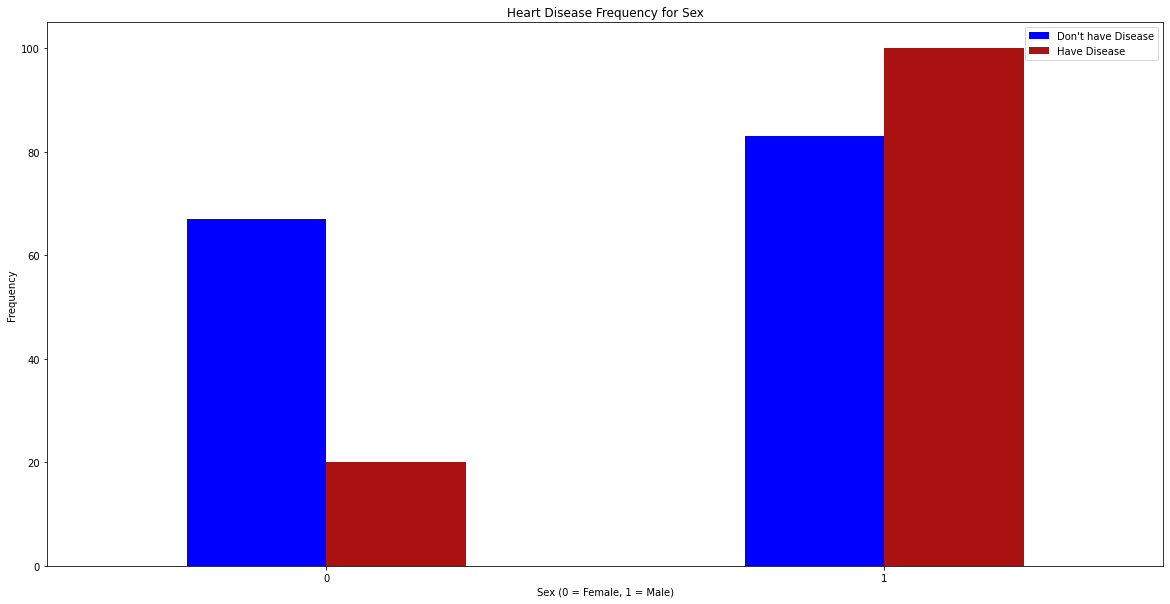

In [23]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [24]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(dataset.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(dataset.sex))*100))

Percentage of Female Patients:32.22%
Percentage of Male Patients:67.78%


### **Age distribution based on heart disease**

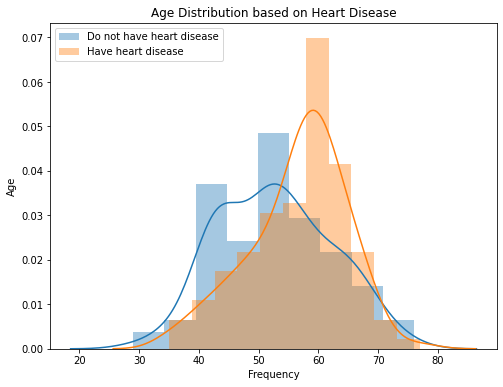

In [25]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

Get min, max and average of the age of the people do not have heart disease

In [26]:
print('Min age of people who do not have heart disease: ', min(dataset[dataset['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(dataset[dataset['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', dataset[dataset['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


Get min, max and average of the age of the people have heart disease

In [27]:
print('Min age of people who have heart disease: ', min(dataset[dataset['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(dataset[dataset['target'] == 2]['age']))
print('Average age of people who have heart disease: ', dataset[dataset['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


From the data, we can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



**Heart Disease Frequency for ages**

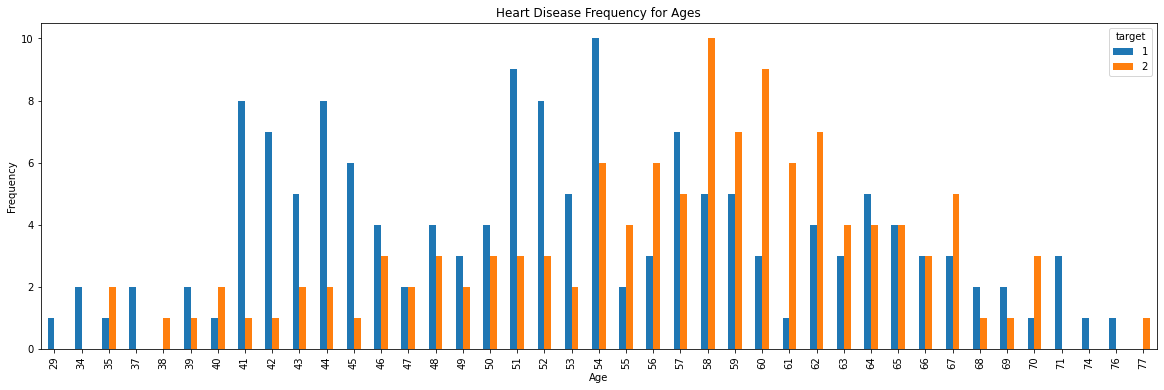

In [28]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

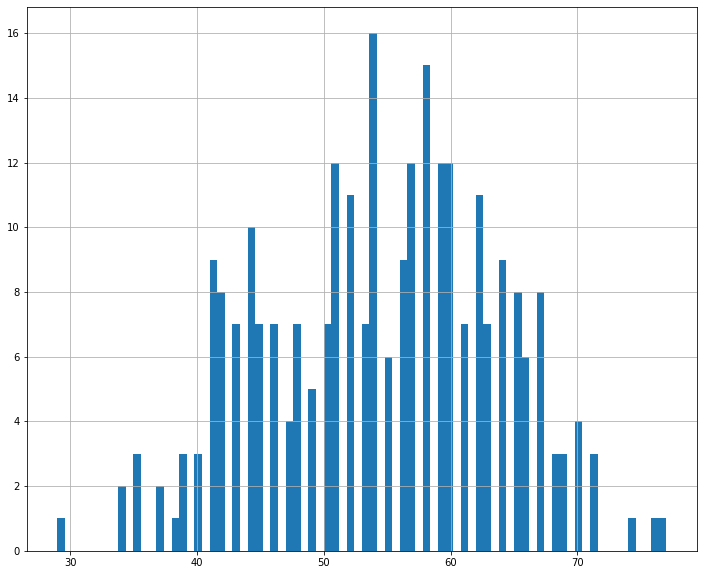

In [29]:
plt.figure(figsize=(12, 10))
dataset.age.hist(bins=80)

In [30]:
print(f"The most of the patients have a mean age of : {dataset.age.mean()}")

The most of the patients have a mean age of : 54.43333333333333


### **Distribution of Categorial features**

In [31]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [32]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [33]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=dataset, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=dataset, ax=axes[ax_index][1])
    avg = dataset[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


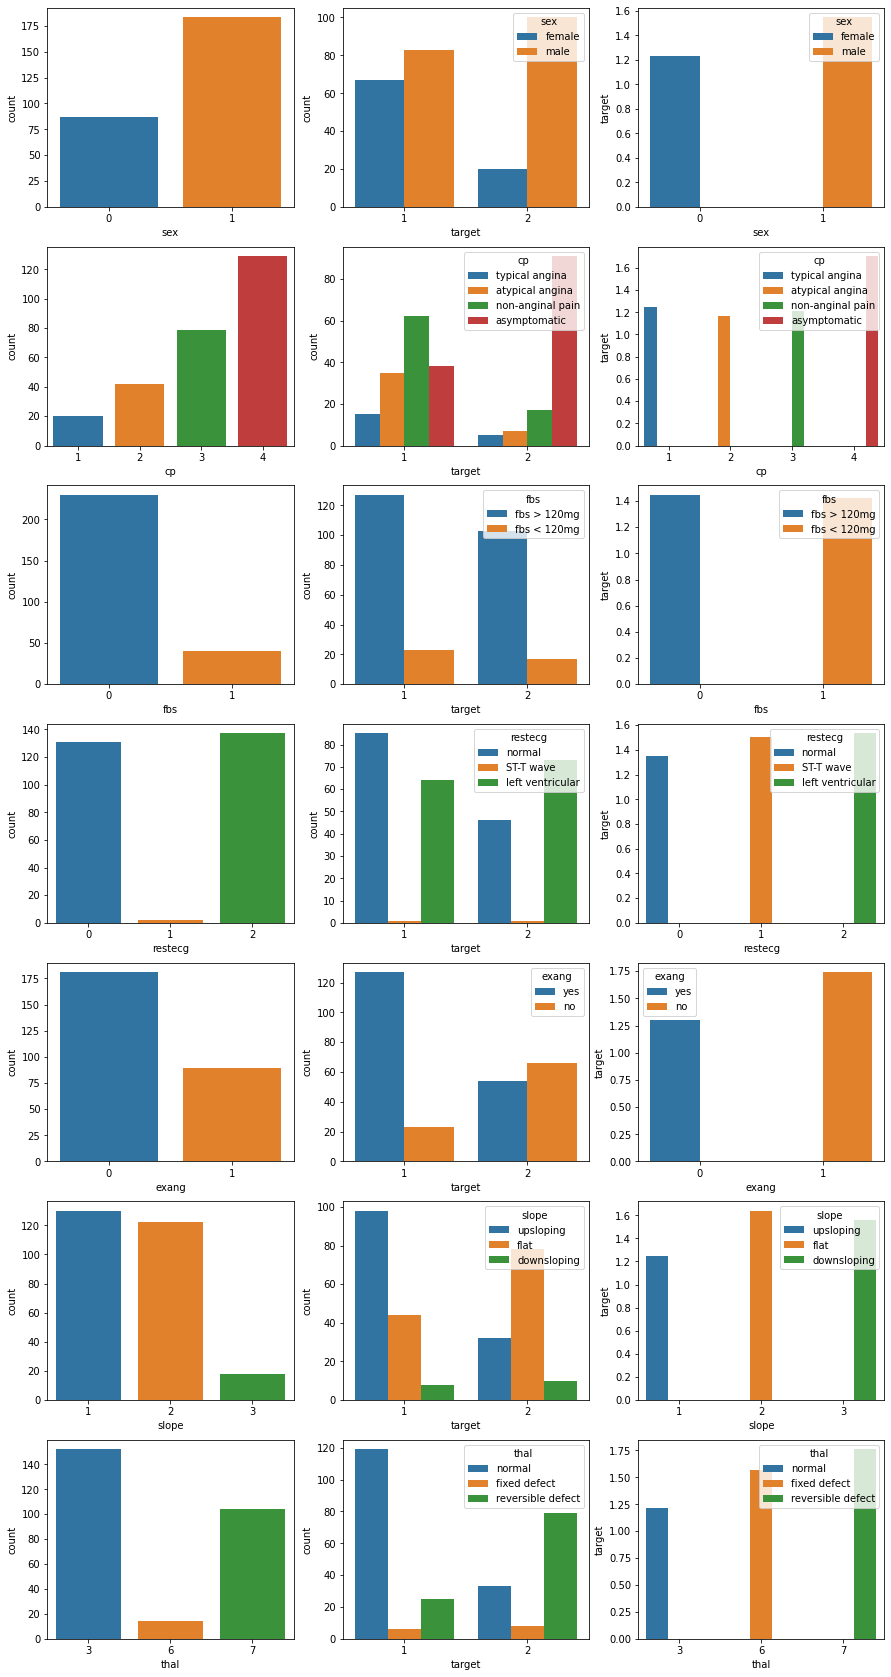

In [34]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(True)

### **Distribution of Continuous features**

In [35]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [36]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(dataset[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=dataset, ax=axes[ax_index][1])

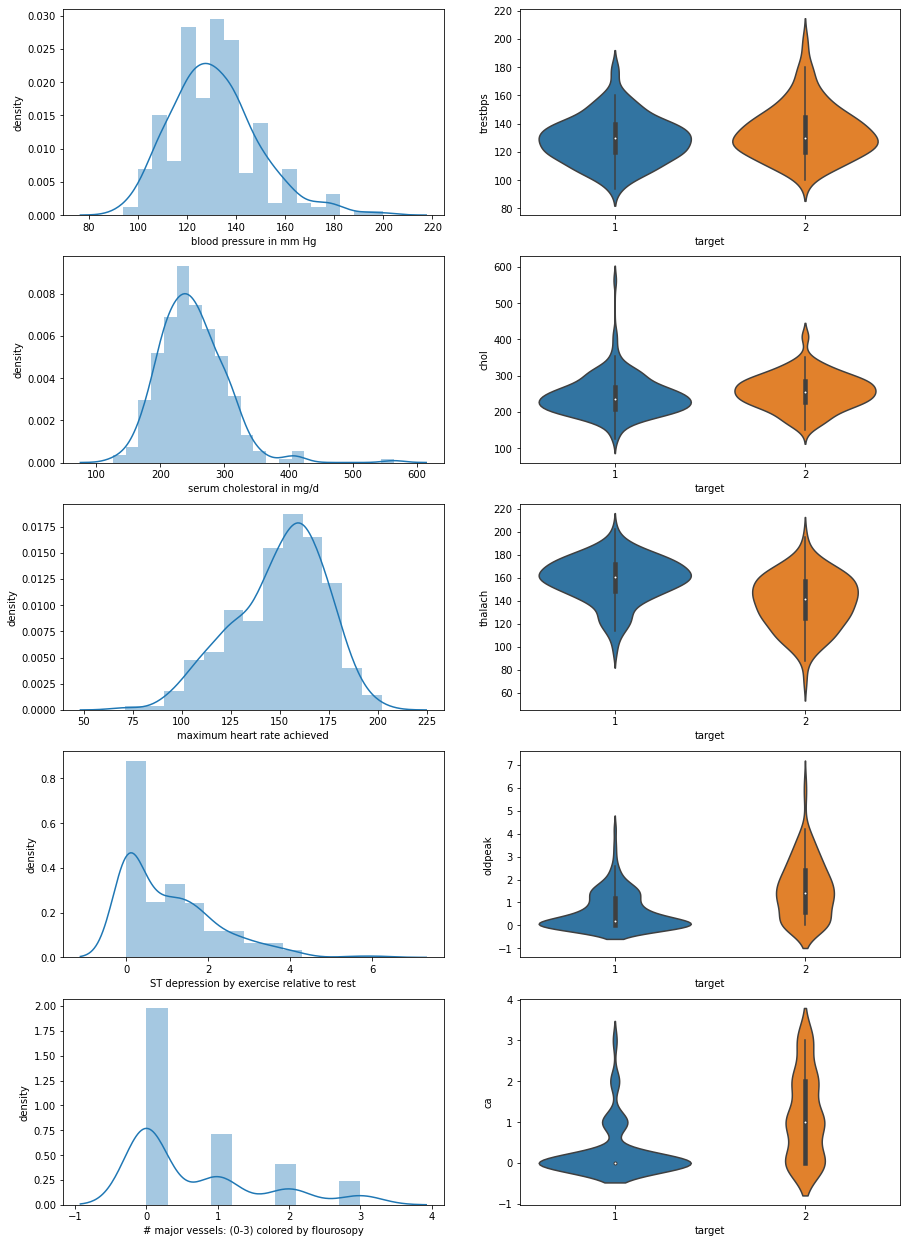

In [37]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

### **PiePlots**

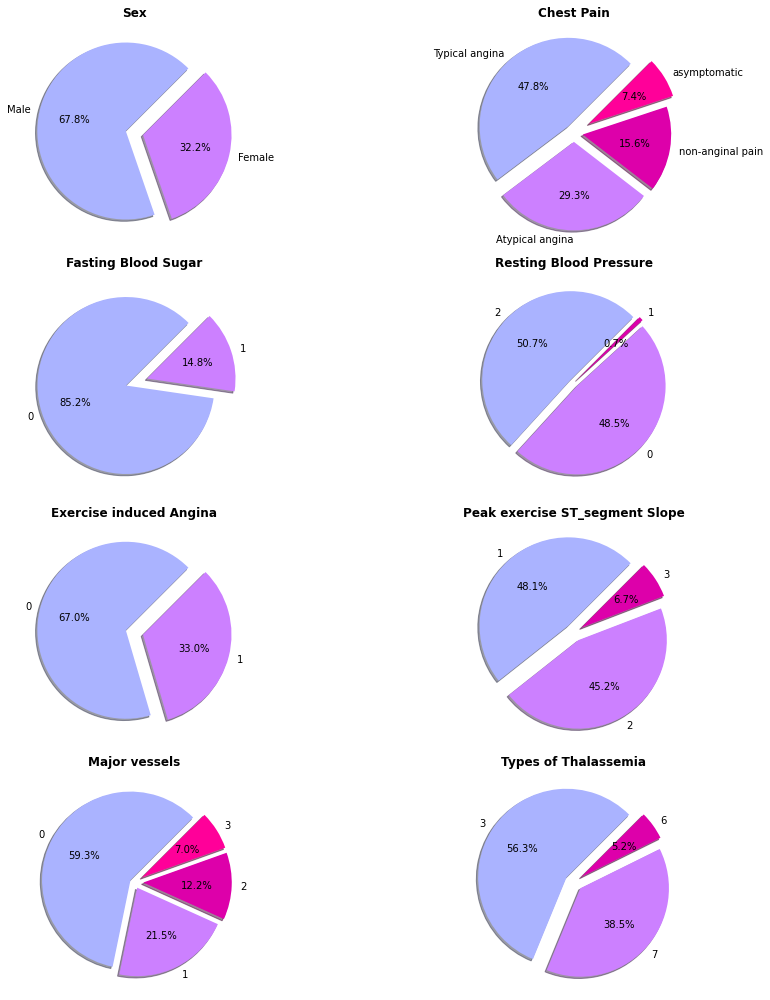

<Figure size 576x432 with 0 Axes>

In [38]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = dataset['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = dataset['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['fbs'].value_counts().index.tolist()[:2]
values = dataset['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['restecg'].value_counts().index.tolist()[:3]
values = dataset['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['exang'].value_counts().index.tolist()[:2]
values = dataset['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['slope'].value_counts().index.tolist()[:3]
values = dataset['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['ca'].value_counts().index.tolist()[:4]
values = dataset['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['thal'].value_counts().index.tolist()[:3]
values = dataset['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1],colors=['#AAb3ff','#CC80FF','#DD00AA'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

### **Target Correlations**

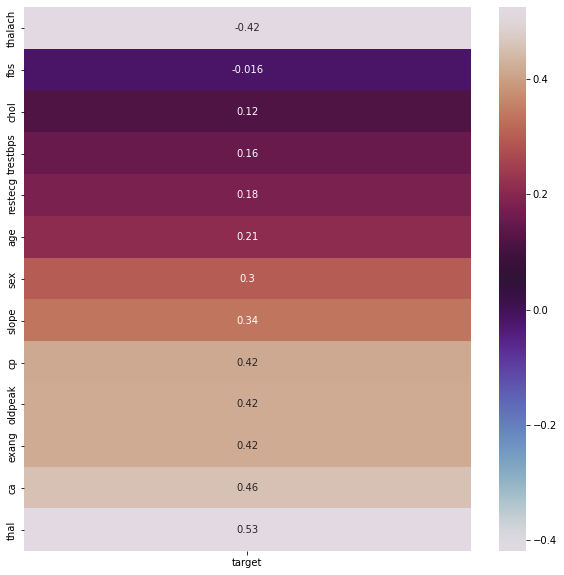

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(dataset.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='twilight')
plt.savefig("TargetCorrelations.png")

### **Feature Importance**

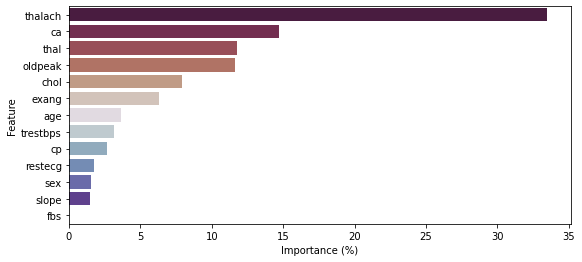

In [40]:
X = dataset.drop('target',axis=1)
Y = dataset['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

### **Analysing Fasting Blood sugar** [fbs]
Heart disease according to Fasting Blood sugar

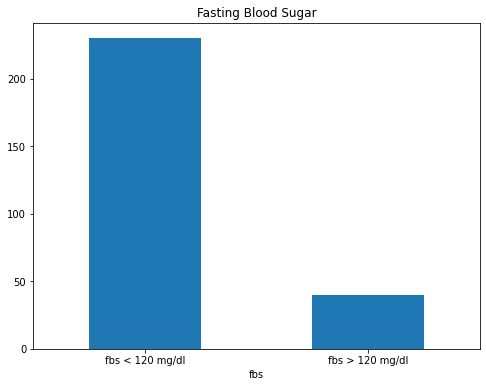

In [41]:
# Display fasting blood sugar in bar chart
dataset.groupby(dataset['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

#### **Display fasting blood sugar based on the target**

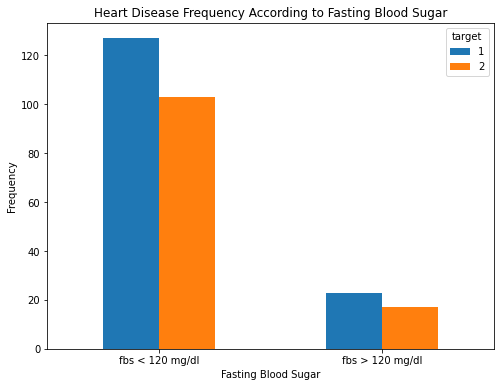

In [42]:
pd.crosstab(dataset.fbs,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### **Analysing the Chest Pain** [cp] (4 types of chest pain)

[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [43]:
dataset["cp"].unique()

array([4, 3, 2, 1])

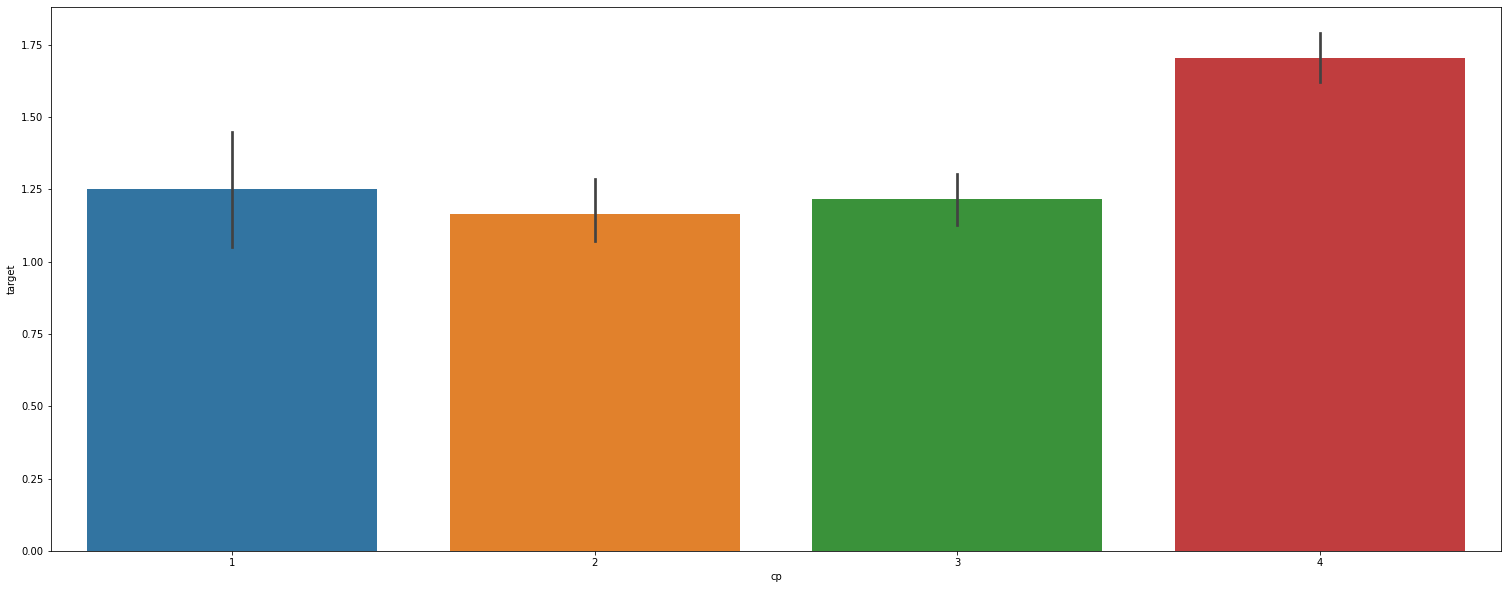

In [44]:
plt.figure(figsize=(26, 10))
sns.barplot(dataset["cp"],y)

**Display chest pain types based on the target**

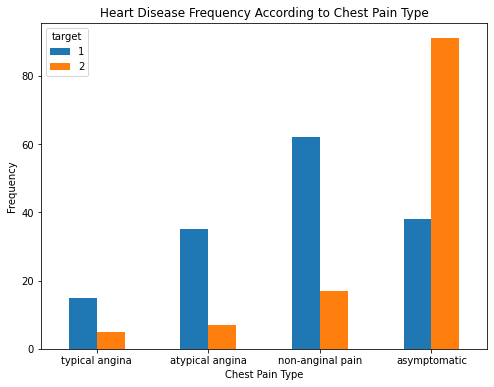

In [45]:
pd.crosstab(dataset.cp,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### **Analysing Resting Blood Pressure** [trestbps]
mm Hg on admission to the hospital

In [46]:
dataset["trestbps"].unique()

array([130, 115, 124, 128, 120, 110, 140, 150, 135, 142, 134, 112, 132,
       138, 160, 170, 144, 122, 152, 101, 126, 118, 136, 105, 174, 145,
       108, 156, 106, 104,  94, 146, 148, 178, 125, 100, 165, 180, 158,
       200, 117, 192, 123, 129, 102, 155, 172])

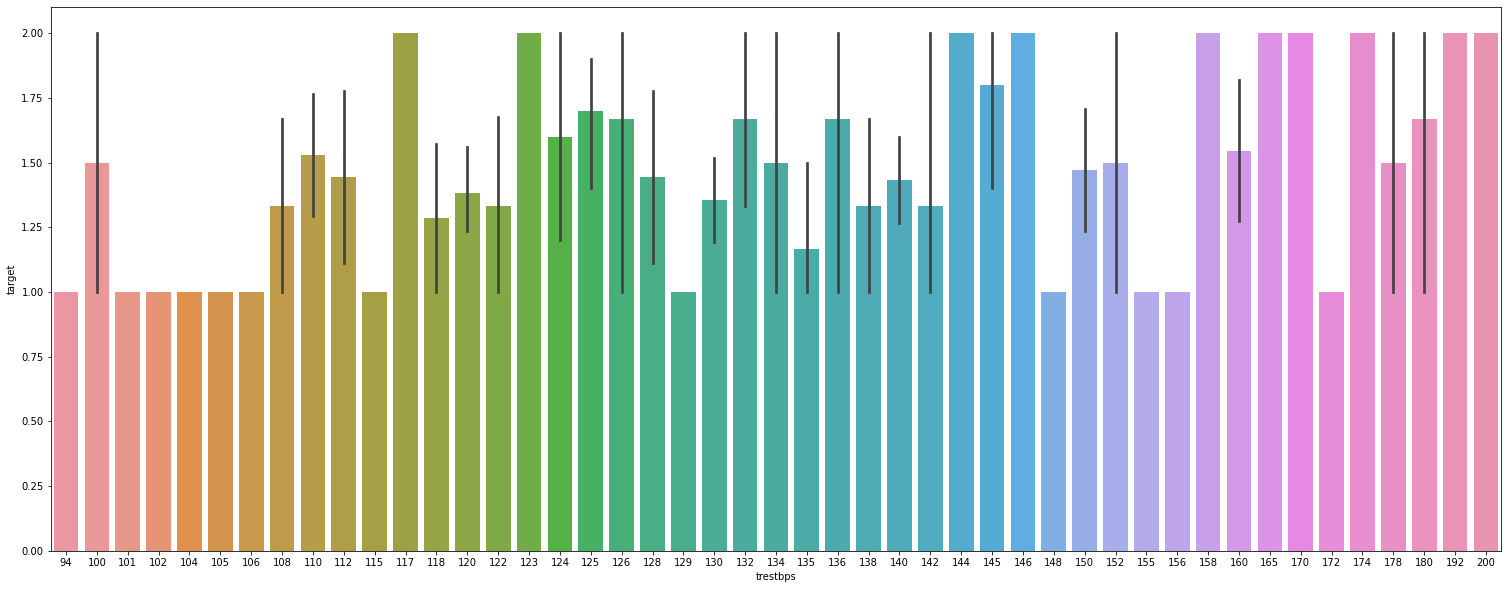

In [47]:
plt.figure(figsize=(26, 10))
sns.barplot(dataset["trestbps"],y)

#### **Display blood pressure distribution based on heart disease**

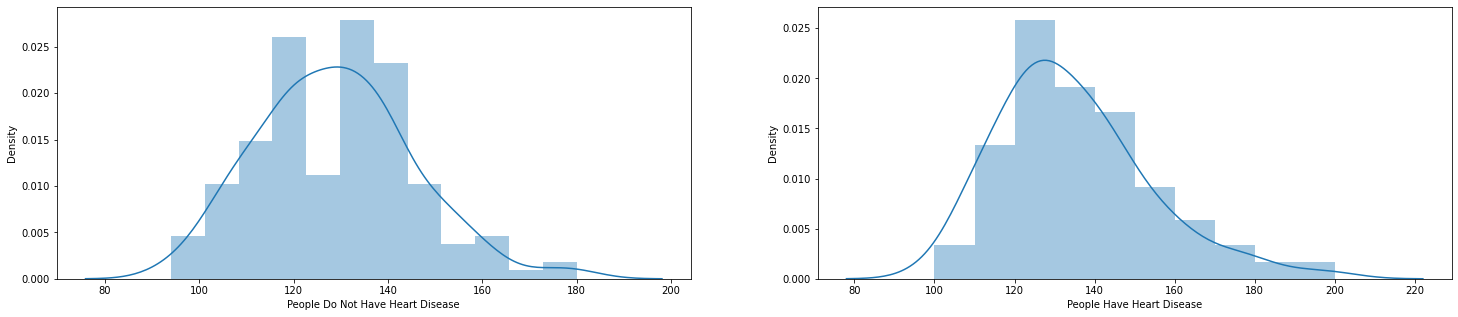

In [48]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(dataset[dataset['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 2]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [49]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(dataset[dataset['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(dataset[dataset['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', dataset[dataset['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [50]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(dataset[dataset['target'] == 2]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(dataset[dataset['target'] == 2]['trestbps']))
print('Average blood pressure of people who have heart disease: ', dataset[dataset['target'] == 2]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666


### **Analysing the Resting Electrocardiographic Measurement** [restecg] 

(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [51]:
dataset["restecg"].unique()

array([2, 0, 1])

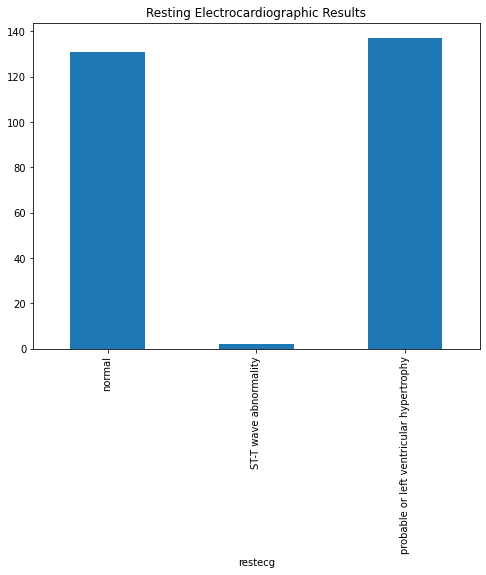

In [52]:
# Display electrocardiographic results in bar chart
dataset.groupby(dataset['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

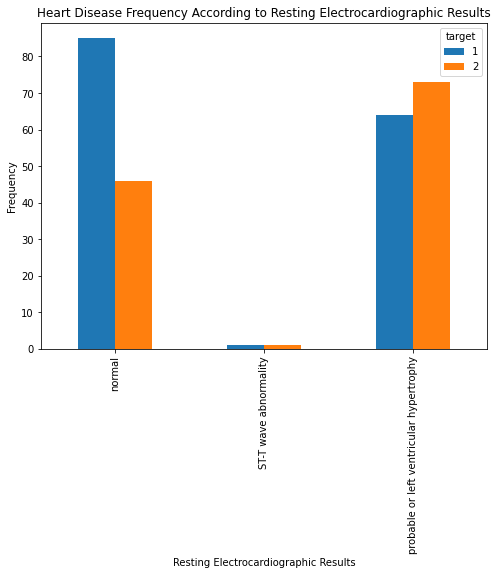

In [53]:
# Display resting electrocardiographic results based on the target
pd.crosstab(dataset.restecg,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### **Analysing Exercise Induced Angina** [exang]
(1 = yes; 0 = no)

In [54]:
dataset["exang"].unique()

array([0, 1])

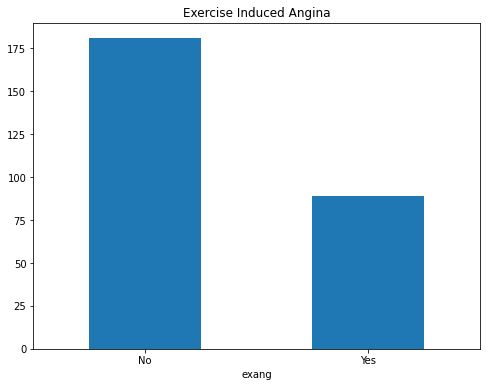

In [55]:
# Display exercise induced angina in bar chart
dataset.groupby(dataset['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

#### **Display exercise induced angina based on the target**

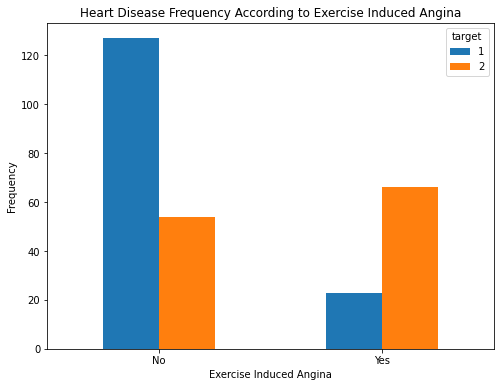

In [56]:
pd.crosstab(dataset.exang,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

The people who suffer from exercise induced angina are more likely to be infected with the heart disease.

### **Analysing the Slope of the peak exercise ST segment** [slope]
 (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [57]:
dataset["slope"].unique()

array([2, 1, 3])

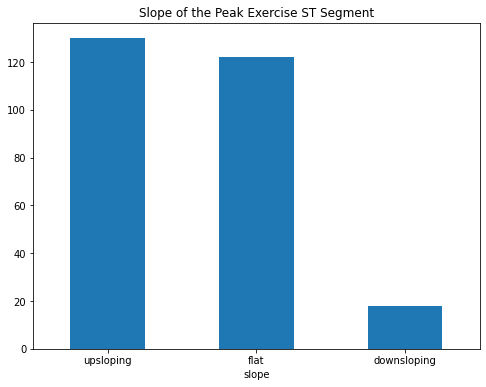

In [58]:
# Display slope of the peak exercise ST segment in bar chart
dataset.groupby(dataset['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

#### **Display slope of the peak exercise ST segment based on the target**

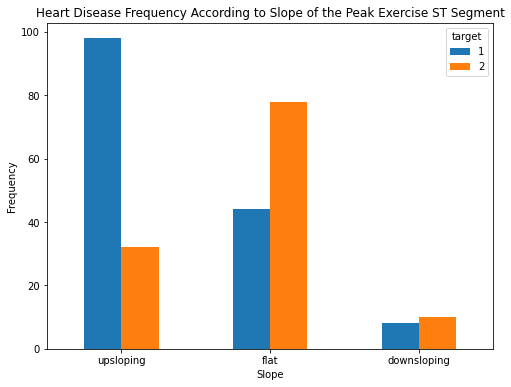

In [59]:
pd.crosstab(dataset.slope,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

As it is clear, the people with flatslope peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### **Analysing Number of Major Vessels (0-3) colored by flourosopy** [ca]

In [60]:
dataset["ca"].unique()

array([3, 0, 1, 2])

#### **Display number of major vessels in bar chart**

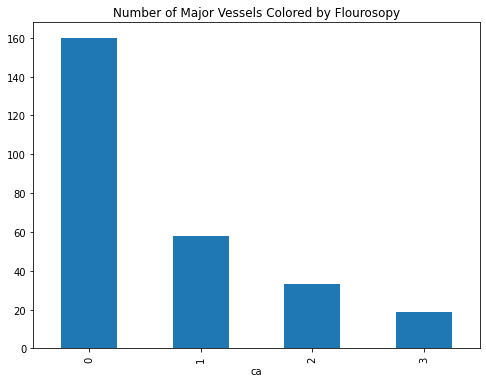

In [61]:
dataset.groupby(dataset['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

#### **Display number of vessels based on the target**

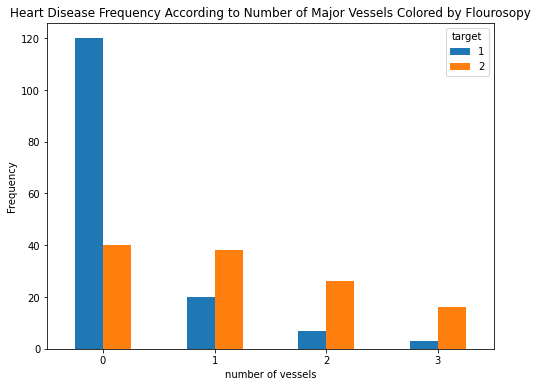

In [62]:
pd.crosstab(dataset.ca,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### **Analysing a Blood Disorder called Thalassemia** [thal]
(3 = normal ; 6 = fixed defect ; 7 = reversable defect)

In [63]:
dataset["thal"].unique()

array([3, 7, 6])

#### **plotting the thalassemia distribution** (3,6,7)

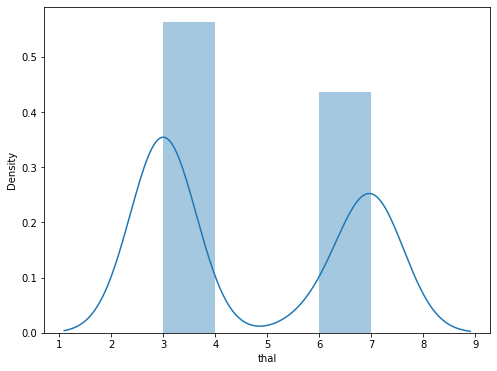

In [64]:
sns.distplot(dataset["thal"])

#### **Display thalassemia in bar chart**

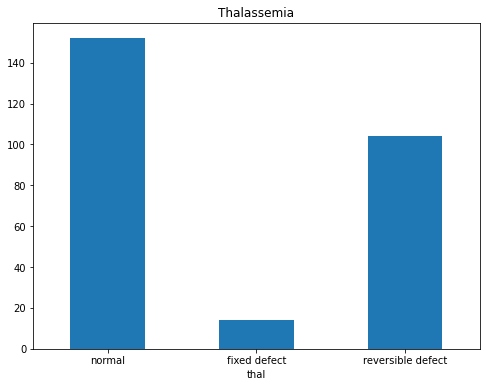

In [65]:
dataset.groupby(dataset['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

#### **Thalassemia compared with target**

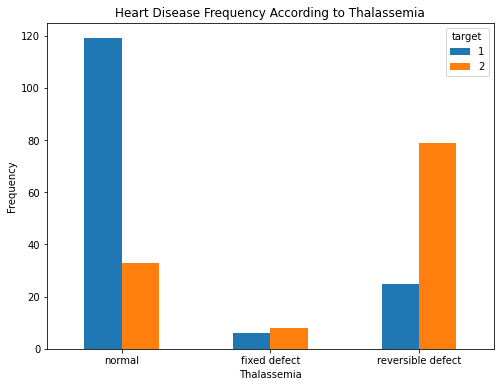

In [66]:
pd.crosstab(dataset.thal,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

As it is clear, the people with reversible defect are likely to have heart disease.

### **Thalassemia vs Cholesterol Scatterplot**

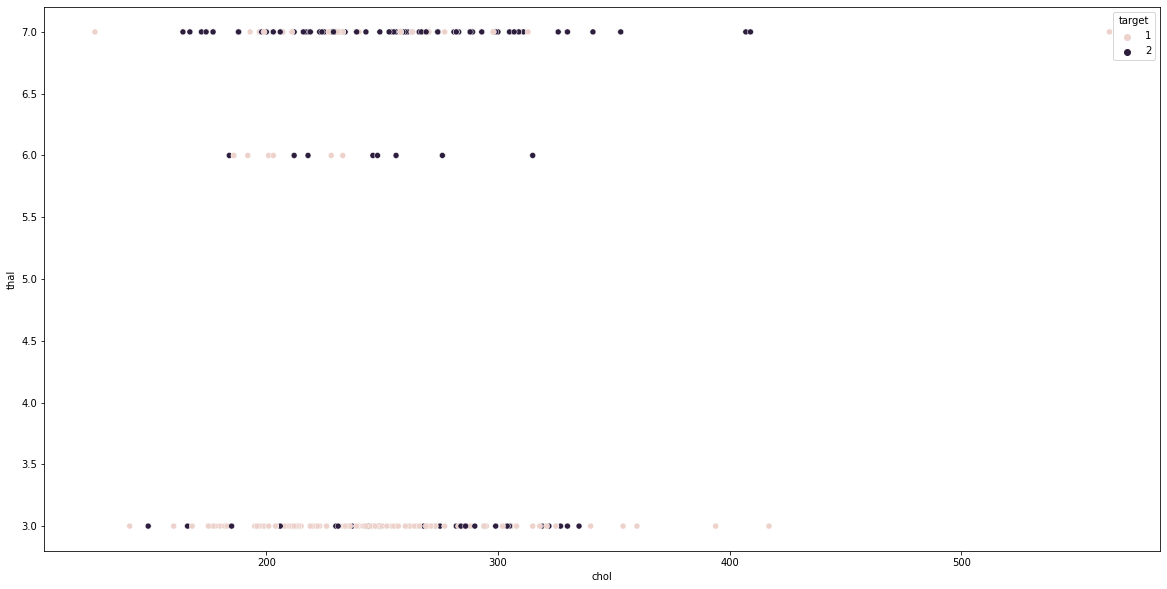

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='chol',y='thal',data=dataset,hue='target')
plt.show()

### **Thalassemia vs Resting blood pressure Scatterplot**

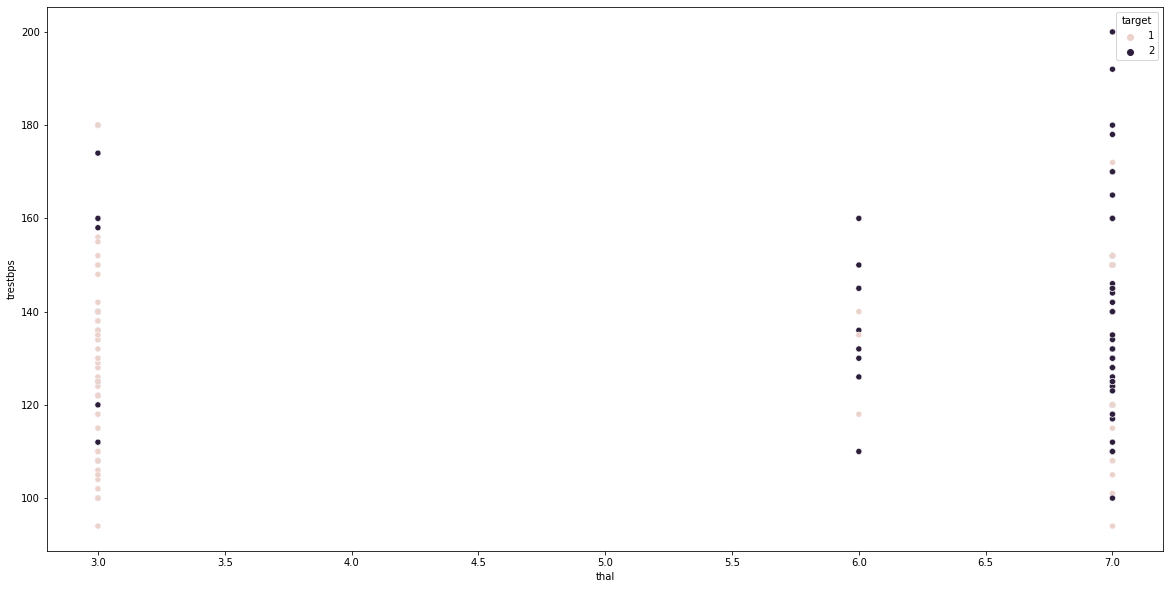

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thal',y='trestbps',data=dataset,hue='target')
plt.show()

### **Thalassemia vs Age Scatterplot**

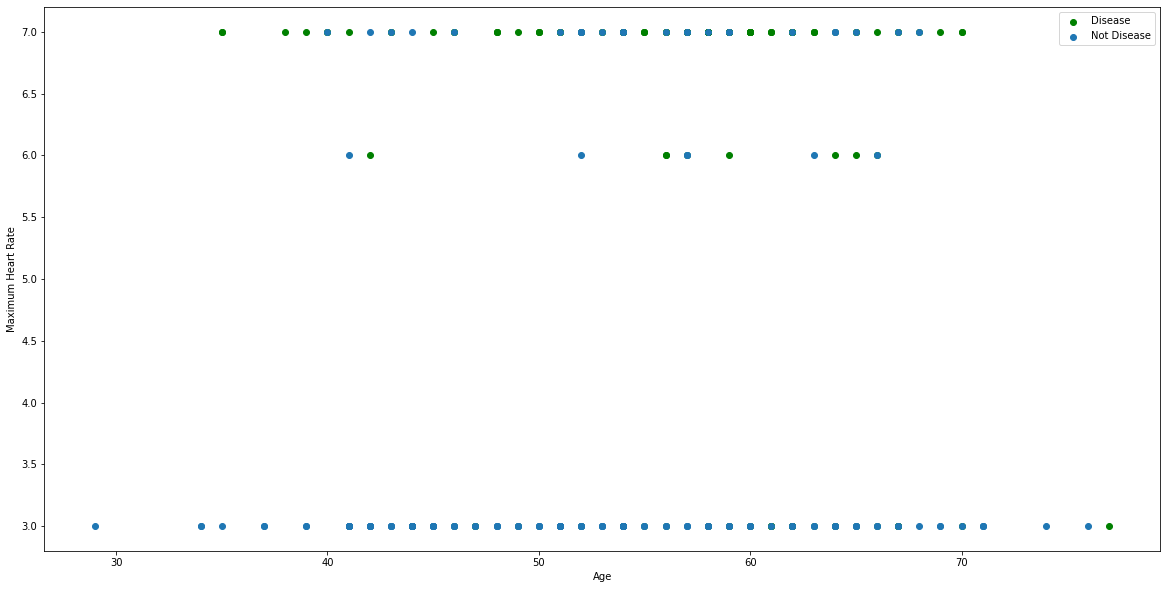

In [69]:
plt.figure(figsize=(20, 10))
plt.scatter(x=dataset.age[dataset.target==2], y=dataset.thal[(dataset.target==2)], c="green")
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thal[(dataset.target==1)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### **Maximum Heart Rate vs Oldpeak(Exercise induced ST-depression in comparison with the state of rest)** 

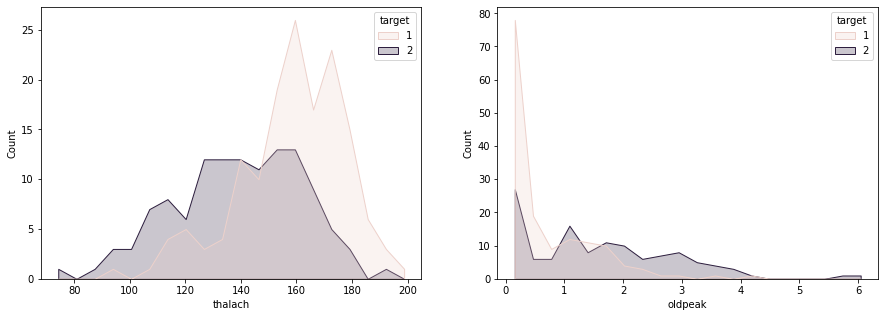

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=dataset,hue='target',x='thalach',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=dataset,hue='target',x='oldpeak',bins=20,element='poly')
plt.savefig("Thalach&oldpeak_Histplot.png")

### **Resting Blood Pressure vs Cholestrol**

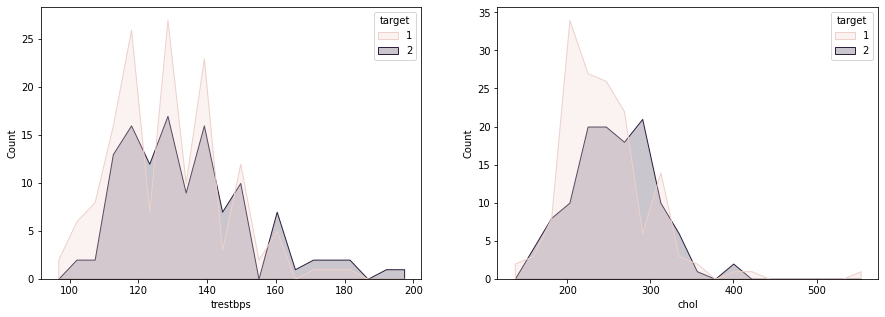

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=dataset,hue='target',x='trestbps',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=dataset,hue='target',x='chol',bins=20,element='poly')
plt.savefig("Resting_blood_pressure&chol_Histplot.png")

### **Pair Plots**

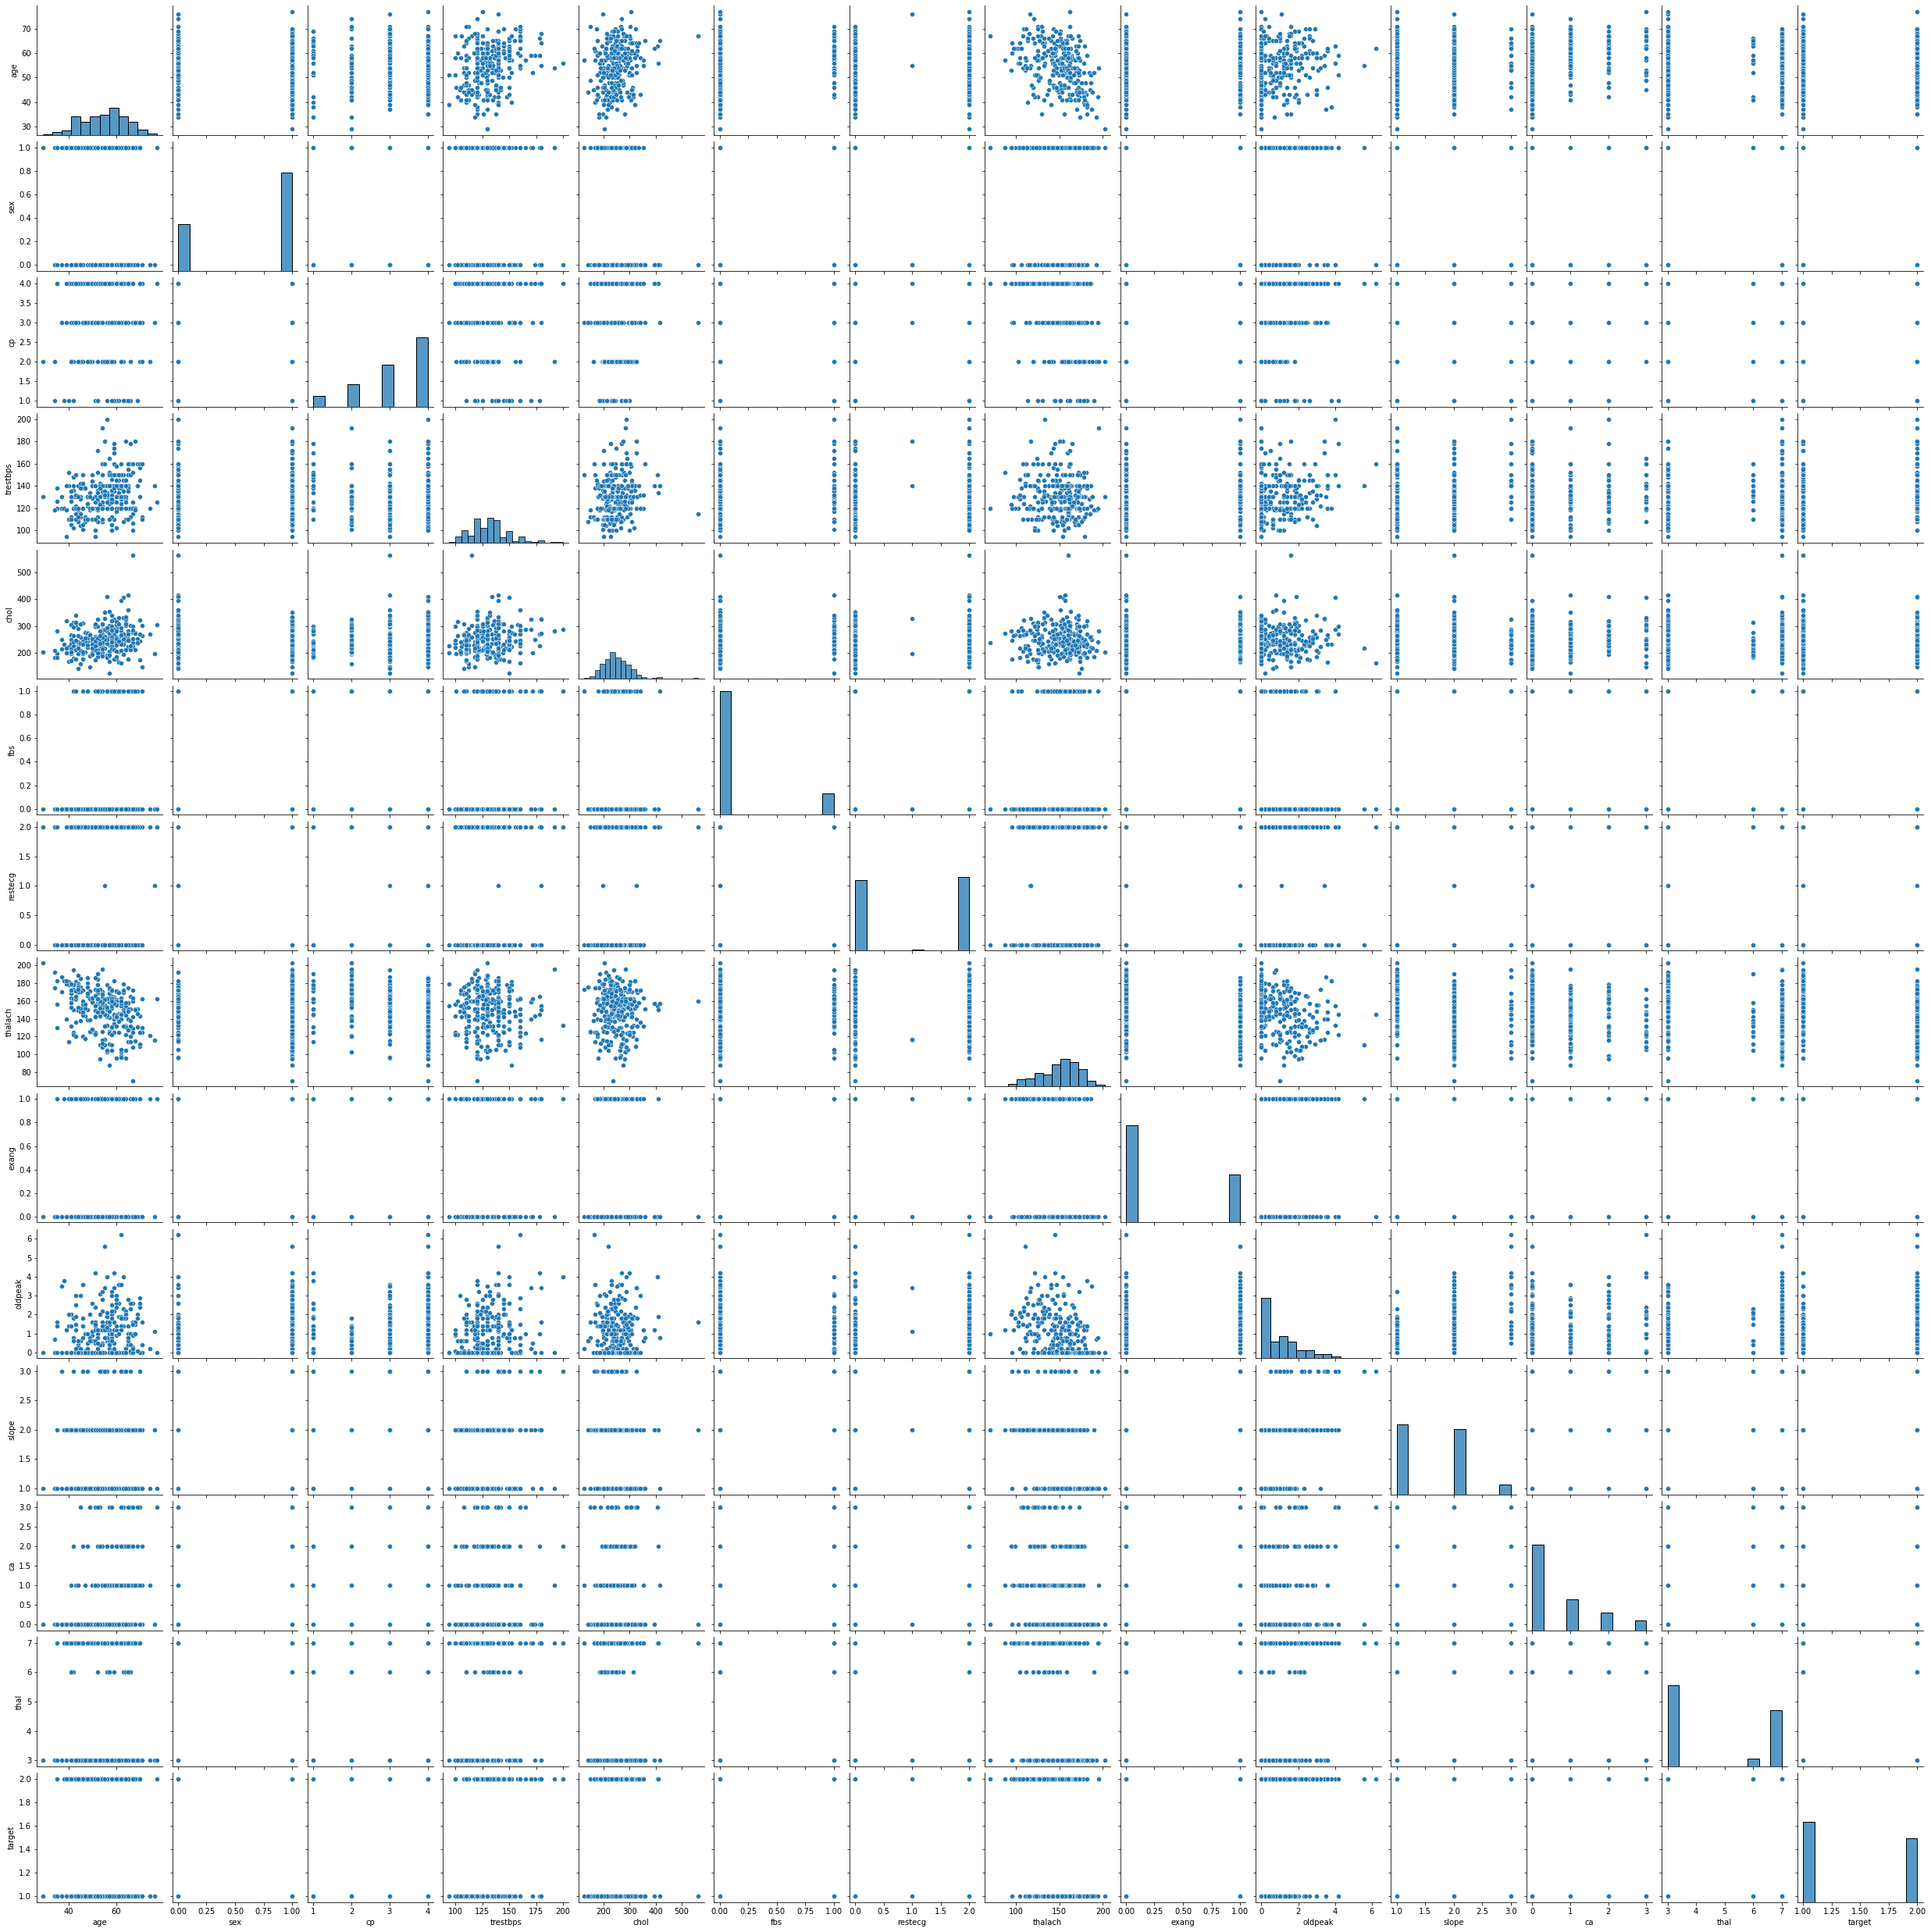

In [72]:
sns.pairplot(data=dataset)

### **Correlation Matrix**
The best way to compare relationship between various features is to look at the correlation matrix between those features.

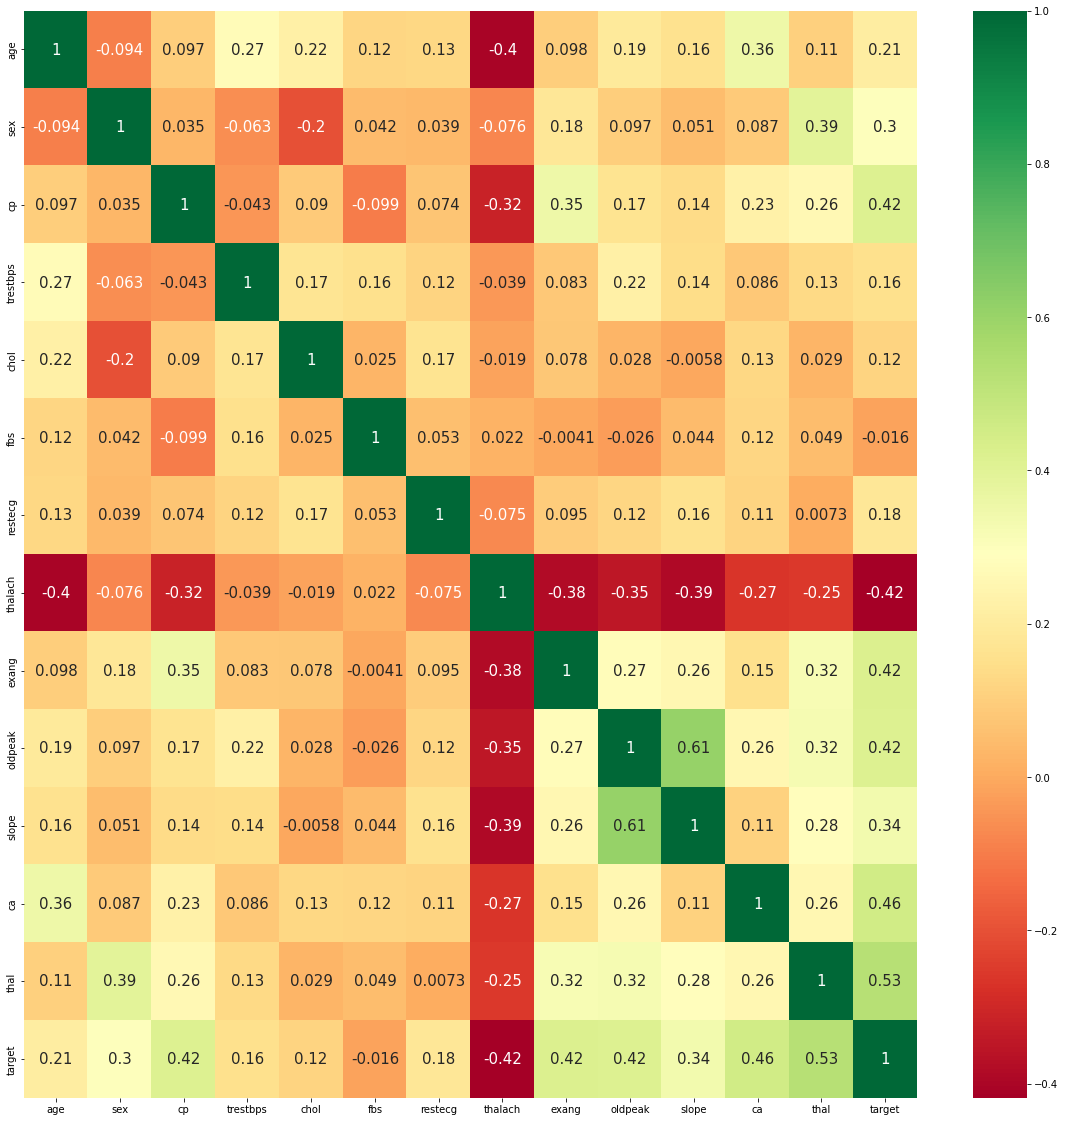

In [73]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. 

## **Data Processing**
After exploring the dataset, we observed that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, we'll use the `get_dummies` method to create dummy columns for categorical variables.

In [74]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, we will use the `StandardScaler` from `sklearn` to scale my dataset.

In [75]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [76]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,2,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,2,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0


In [77]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,3.667848e-16,5.723816e-16,-2.343804e-16,-1.266477e-16,4.111937e-17,1.444444,0.322222,0.677778,0.074074,0.155556,0.292593,0.477778,0.851852,0.148148,0.485185,0.007407,0.507407,0.670370,0.329630,0.481481,0.451852,0.066667,0.592593,0.214815,0.122222,0.070370,0.562963,0.051852,0.385185
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,0.497827,0.468195,0.468195,0.262378,0.363107,0.455798,0.500434,0.355906,0.355906,0.500709,0.085906,0.500874,0.470952,0.470952,0.500585,0.498601,0.249907,0.492264,0.411456,0.328151,0.256245,0.496941,0.222140,0.487543
min,-2.797275e+00,-2.094649e+00,-2.396942e+00,-3.402609e+00,-9.185652e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.075676e-01,-6.363095e-01,-7.105825e-01,-7.212705e-01,-9.185652e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.232461e-02,-7.540984e-02,-9.031247e-02,1.653012e-01,-2.187060e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.222322e-01,4.854898e-01,5.881079e-01,7.058937e-01,4.811532e-01,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.481986e+00,3.850888e+00,6.093004e+00,2.262800e+00,4.505343e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Train Test Split**
We'll now import train_test_split to split our dataset into training and testing datasets. Then, we'll import all Machine Learning models we'll be using to train and test the data.

In [78]:
Y = dataset['target'].values
X = dataset.drop('target',axis=1).values

In [79]:
X.shape

(270, 28)

In [80]:
Y.shape

(270,)

In [81]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 216 records and Testing features have 54 records.


**Checking distribution of traget variable in train test split**

In [82]:
print('--------------Training Set----------------')
print(X_train.shape)
print(Y_train.shape)
print('----------------Test Set------------------')
print(X_test.shape)
print(Y_test.shape)

--------------Training Set----------------
(216, 28)
(216,)
----------------Test Set------------------
(54, 28)
(54,)


## **Machine Learning Model**

### **1. Random Forest Classifier**
Now, we'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [83]:
max_accuracy = 0

for x in range(500):
    rf_classifier = RandomForestClassifier(random_state=x)
    rf_classifier.fit(X_train,Y_train)
    Y_pred_rf = rf_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)



85.19
192


In [84]:
rf_classifier = RandomForestClassifier(random_state=best_x)
rf_classifier.fit(X_train,Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
Y_pred_rf.shape

(54,)

In [85]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

85.19

#### **Model Evaluation:**
In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metrics for this problem domain are Accuracy, Sensitivity, Specificity, Precision, F1-measure,Log Loss, ROC and mathew correlation coefficient.


* **Accuracy:** which refers to how close a measurement is to the true value and can be calculated using the following formula

![image](https://user-images.githubusercontent.com/30470730/72439883-c586f180-37cd-11ea-94a3-09c09cbd4814.png)

* **Precision:** which is how consistent results are when measurements are repeated and can be calculated using the following formula

![image](https://user-images.githubusercontent.com/30470730/72440009-10a10480-37ce-11ea-8f11-0a3352d0646c.png)


* **Mathew Correlation coefficient (MCC):**

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

![](https://i.ibb.co/mH6MmG4/mcc.jpg)


* **Log Loss:**

Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

![](https://i.ibb.co/6BdDczW/log-loss.jpg)

* **F1 Score:**

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2(Recall Precision) / (Recall + Precision)**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.851852,0.866667,0.866667,0.866667,0.866667,0.85,19.188653,0.7


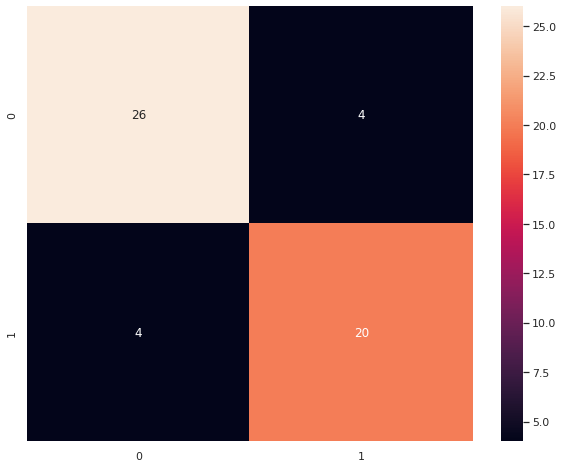

In [104]:
y_pred_rfe = rf_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_rfe)
acc= accuracy_score(Y_test, y_pred_rfe)
roc=roc_auc_score(Y_test, y_pred_rfe)
prec = precision_score(Y_test, y_pred_rfe)
rec = recall_score(Y_test, y_pred_rfe)
f1 = f1_score(Y_test, y_pred_rfe)

mathew = matthews_corrcoef(Y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [87]:
Y_pred_rf = np.around(Y_pred_rf) 
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



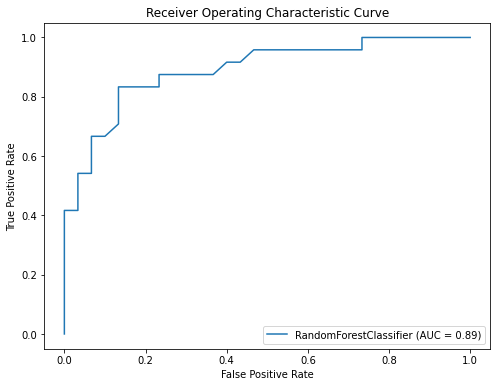

In [88]:
plot_roc_curve(rf_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

### **2. K-Nearest Neighbors Classifier**

The classification score varies based on different values of neighbors that we choose. Thus, we'll plot a score graph for different values of K (neighbors) and check when do we achieve the best score.

In [89]:
knn_classifier= KNeighborsClassifier(n_neighbors=31,leaf_size=30)
knn_classifier.fit(X_train,Y_train)
Y_pred_knn = knn_classifier.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
score_knn

79.63

#### **Model Evaluation:**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,K-Nearest Neighbors,0.796296,0.787879,0.866667,0.866667,0.825397,0.7875,19.188653,0.586094


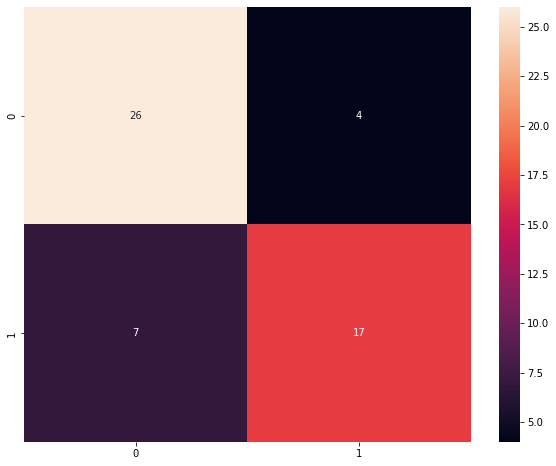

In [90]:
y_pred_knne = knn_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_knne)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_knne)
acc= accuracy_score(Y_test, y_pred_knne)
roc=roc_auc_score(Y_test, y_pred_knne)
prec = precision_score(Y_test, y_pred_knne)
rec = recall_score(Y_test, y_pred_knne)
f1 = f1_score(Y_test, y_pred_knne)

mathew = matthews_corrcoef(Y_test, y_pred_knne)
model_results =pd.DataFrame([['K-Nearest Neighbors ',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [91]:
Y_pred_knn = np.around(Y_pred_knn) 
print(metrics.classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           1       0.79      0.87      0.83        30
           2       0.81      0.71      0.76        24

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.79        54



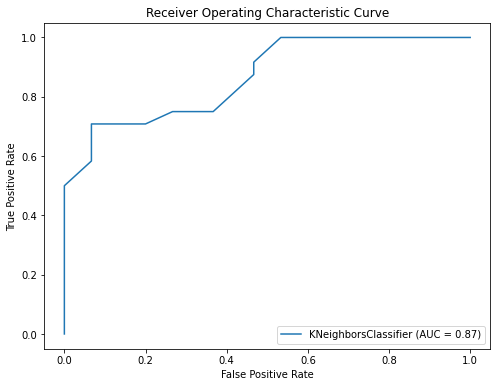

In [92]:
plot_roc_curve(knn_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("KNN.png")

### **3. Decision Tree Classifier**
Here, we'll use the Decision Tree Classifier to model the problem at hand. We'll vary between a set of `max_features` and see which returns the best accuracy.

In [93]:
dt_classifier = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
dt_classifier.fit(X_train, Y_train)
Y_pred_dt=dt_classifier.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
score_dt

70.37

#### **Model Evaluation:**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Decision Tree,0.703704,0.769231,0.666667,0.666667,0.714286,0.708333,19.188653,0.414371


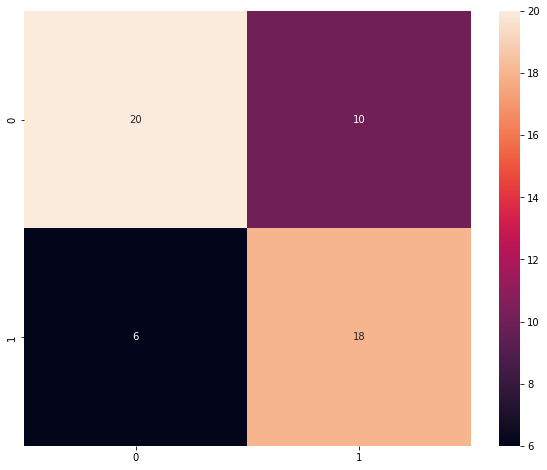

In [94]:
y_pred_dte = dt_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_dte)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_dte)
acc= accuracy_score(Y_test, y_pred_dte)
roc=roc_auc_score(Y_test, y_pred_dte)
prec = precision_score(Y_test, y_pred_dte)
rec = recall_score(Y_test, y_pred_dte)
f1 = f1_score(Y_test, y_pred_dte)

mathew = matthews_corrcoef(Y_test, y_pred_dte)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [95]:
Y_pred_dt = np.around(Y_pred_dt)
print(metrics.classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           1       0.77      0.67      0.71        30
           2       0.64      0.75      0.69        24

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.71      0.70      0.70        54



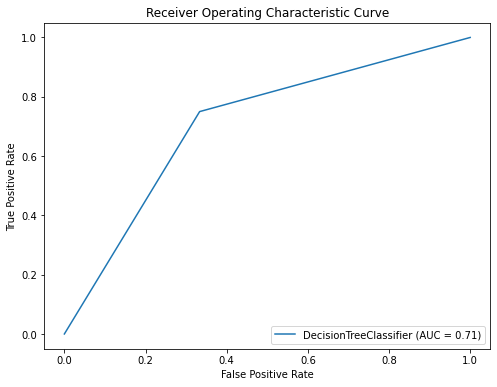

In [96]:
plot_roc_curve(dt_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

### **4. Naive Bayes Classifier**
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

In [97]:
nb_classifier = GaussianNB( var_smoothing=1e-50)
nb_classifier.fit(X_train,Y_train)
nb_classifier.predict(X_test)
Y_pred_nb = nb_classifier.predict(X_test)          
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
score_nb

66.67

#### **Model Evaluation:**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Naive Bayes,0.666667,0.714286,0.666667,0.666667,0.689655,0.666667,19.188653,0.331497


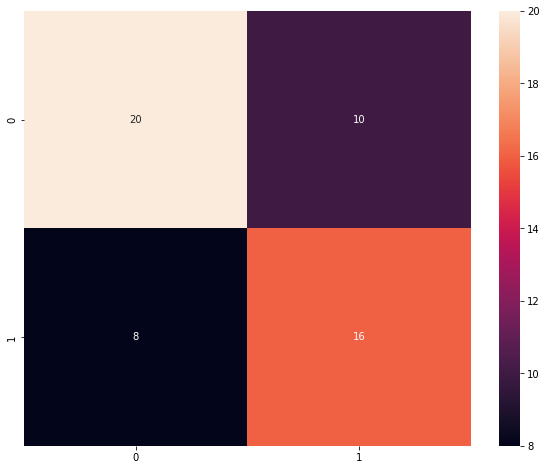

In [98]:
y_pred_nbe = nb_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_nbe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_nbe)
acc= accuracy_score(Y_test, y_pred_nbe)
roc=roc_auc_score(Y_test, y_pred_nbe)
prec = precision_score(Y_test, y_pred_nbe)
rec = recall_score(Y_test, y_pred_nbe)
f1 = f1_score(Y_test, y_pred_nbe)

mathew = matthews_corrcoef(Y_test, y_pred_nbe)
model_results =pd.DataFrame([['Naive Bayes ',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [99]:
Y_pred_nb = np.around(Y_pred_nb)
print(metrics.classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           1       0.71      0.67      0.69        30
           2       0.62      0.67      0.64        24

    accuracy                           0.67        54
   macro avg       0.66      0.67      0.66        54
weighted avg       0.67      0.67      0.67        54



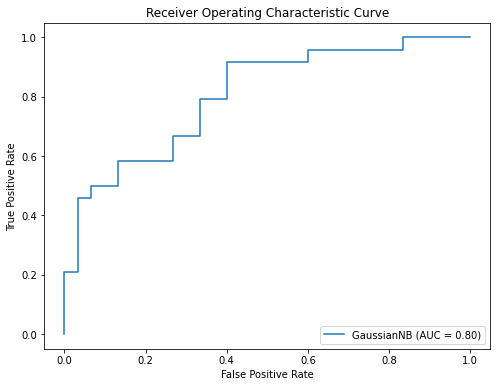

In [100]:
plot_roc_curve(nb_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

## **Final Scores**

In [101]:
scores = [score_rf,score_knn,score_nb,score_dt]
Models = ["Random Forest Classifier"," K-Nearest Neighbors Classifier","Navie Bayes Classifier","Decision Tree Classifier"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest Classifier is: 85.19 %
The accuracy score achieved using  K-Nearest Neighbors Classifier is: 79.63 %
The accuracy score achieved using Navie Bayes Classifier is: 66.67 %
The accuracy score achieved using Decision Tree Classifier is: 70.37 %


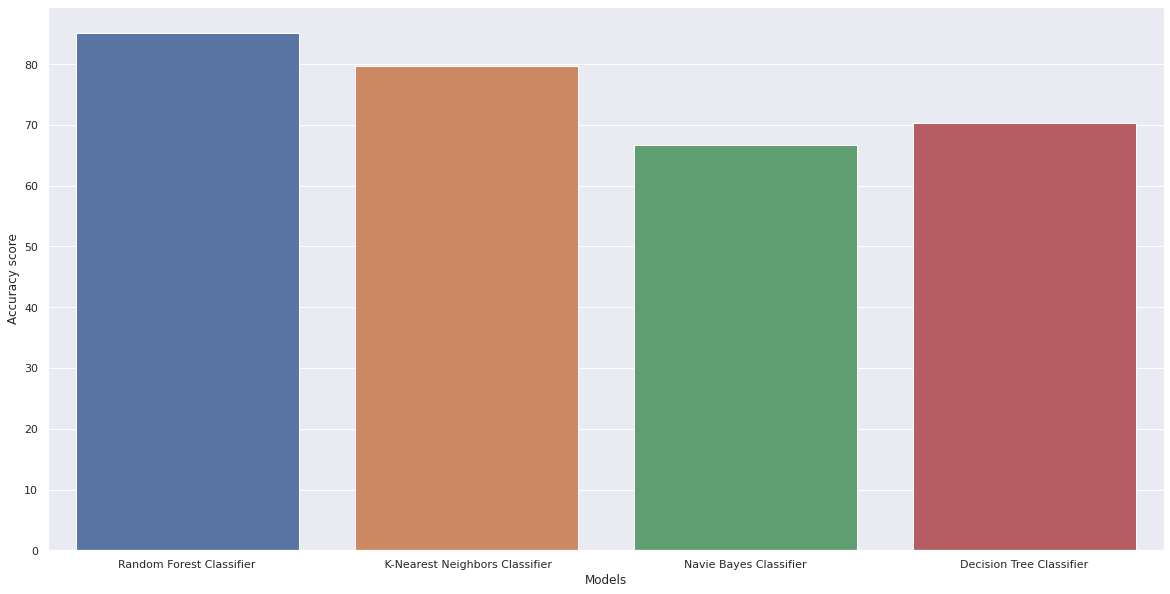

In [102]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models")
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")

## **Sample Test**

In [ ]:
'''Input = (67, 0, 3, 115, 564, 0, 2, 160, 0, 1.6, 2, 0, 7)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf_classifier.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 1):
  print('The Person does not have a Heart Disease')
else:
  print("The Person is likely to have Heart Disease by %f "%(prediction))
'''

[1]
The Person does not have a Heart Disease


In [ ]:
'''Input = (70,1,4,130,322,0,2,109,0,2.4,2,3,3)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf_classifier.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 1):
  print('The Person does not have a Heart Disease')
else:
  print("The Person is likely to have Heart Disease by %f "%(prediction))
'''

[2]
The Person is likely to have Heart Disease by 2.000000 


## **Save Model**
 
Since The Random forest Classifier gets the best result, We will use it as our main model to connect it's API with the GUI 

In [103]:
import pickle
with open('models.pkl', 'wb') as file:
  pickle.dump(rf_classifier, file)

## **Conclusion**
In this project, we used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, we analysed it using plots. Then, we generated dummy variables for categorical features and scaled other features. We then applied four Machine Learning algorithms, K-Nearest Neighbors Classifier(79.63%), Random Forest Classifier(85.19%), Decision Tree Classifier(70.37%) and Naive Bayes Classifier(66.67%). 

As we can see from Model Evaluation results, **Random Forest Classifier** is best performer as it has highest test accuracy of 0.8519, sensitivity of 0.8667 and specificity of 0.8667 and highest f1-score of 0.8667 and lowest Log Loss of 19.1886.